# 机器学习作业 1 - 线性回归

## 1.单变量线性回归

导入需要使用的包

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

导入数据集。提醒大家：一定要把数据文件ex1data1.txt放在和程序同一个文件夹里，否则需要使用绝对路径访问文件

In [3]:
path =  'G:\机器学习\深度之眼-吴恩达机器学习\作业1（学员版）\ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()  #预览数据

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [9]:
data.describe()
data.Population[0]

6.1101

数据可视化，绘制散点图

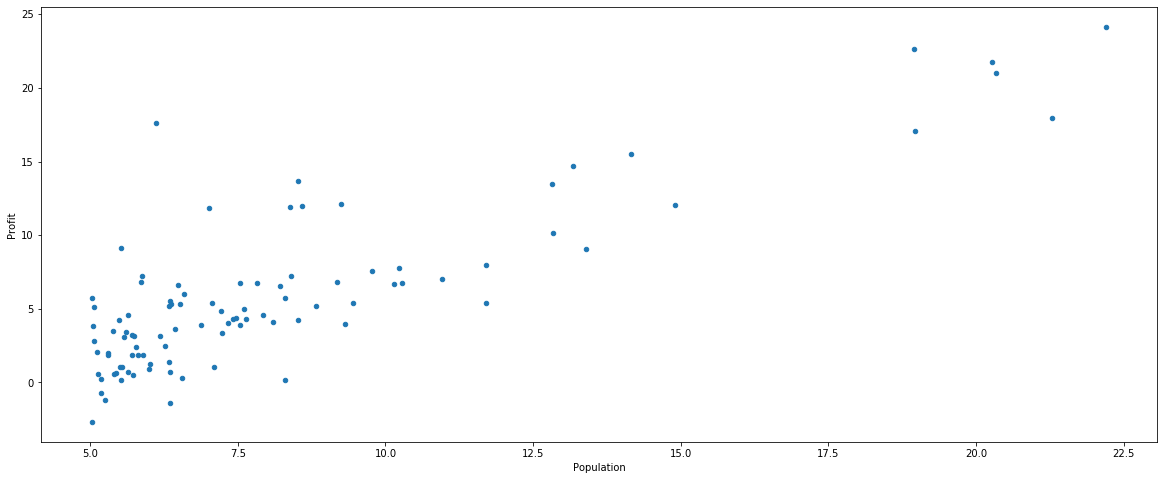

In [6]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(20,8))
plt.show()

现在让我们使用梯度下降来实现线性回归，以最小化成本函数。 以下代码示例中实现的方程在“练习”文件夹中的“ex1.pdf”中有详细说明。

首先，我们将创建一个以参数θ为特征函数的代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [25]:
def computeCost(X, y, theta):
    # 此处X，y,theta的类型均为矩阵
    inner = np.power((X*theta.T-y),2)
    return np.sum(inner)/2/len(X)

让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度。

In [11]:
data.insert(0, 'Ones', 1)

现在我们来做一些变量初始化。

In [12]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]#X是所有行，最后一列

观察下 X (训练集) and y (目标变量)是否正确.

In [13]:
X.head()#head()是观察前5行

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [14]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


代价函数是应该是numpy矩阵，所以我们需要转换X和Y，然后才能使用它们。 我们还需要初始化theta，即把theta所有元素都设置为0.

In [21]:
X = np.matrix(X)
y = np.matrix(y)
# your code here  (appro ~ 1 lines)
theta = np.matrix([0,0])

theta 是一个(1,2)矩阵

In [22]:
theta

matrix([[0, 0]])

看下维度

In [23]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

计算代价函数 (theta初始值为0).

In [26]:
computeCost(X, y, theta)

32.072733877455676

# 2.batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [ ]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        # your code here  (appro ~ 1 lines)
        theta[0]=theta[0]-alpha*
        for j in range(parameters):
            # your code here  (appro ~ 2 lines)
            
            
        # your code here  (appro ~ 2 lines)    
        cost =
        
    return theta, cost

初始化一些附加变量 - 学习速率α和要执行的迭代次数。

In [ ]:
alpha = 0.01
iters = 1000

现在让我们运行梯度下降算法来将我们的参数θ适合于训练集。

In [ ]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

最后，我们可以使用我们拟合的参数计算训练模型的代价函数（误差）。

In [ ]:
computeCost(X, y, g)

现在我们来绘制线性模型以及数据，直观地看出它的拟合。

In [ ]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

由于梯度方程式函数也在每个训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 3.多变量线性回归

练习1还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。 我们使用我们已经应用的技术来分析数据集。

In [ ]:
path =  'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

对于此任务，我们添加了另一个预处理步骤 - 特征归一化。 这个对于pandas来说很简单

In [ ]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

现在我们重复第1部分的预处理步骤，并对新数据集运行线性回归程序。

In [ ]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

我们也可以快速查看这一个的训练进程。

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# 4. normal equation（正规方程）(选做)
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [ ]:
# 正规方程
def normalEqn(X, y):
    # your code here  (appro ~ 1 lines)
    
    return theta

In [ ]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

In [ ]:
#梯度下降得到的结果是matrix([[-3.24140214,  1.1272942 ]])

在练习2中，我们将看看分类问题的逻辑回归。